# Assignment 1: ICU Mortality Prediction

Author:  
Alberto de los Ríos Salmerón  


## Imports

These are the python libraries that we will use in this project. 


- pandas: Provides data structures like DataFrames for efficient data manipulation and analysis, making it easy to clean, filter, and process structured data.


[pandas Dataframe documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)


- sklearn (scikit-learn): Offers machine learning tools for classification, regression, clustering, and preprocessing, including model selection and evaluation.


[scikit-learn documentation](https://scikit-learn.org/stable/api/index.html)


- numpy: Supports numerical computing with multi-dimensional arrays, mathematical functions, and efficient operations for handling large datasets.


[numpy documentation](https://numpy.org/doc/2.1/reference/#)


- scipy: Extends NumPy with advanced scientific and technical computing functions, including optimization, signal processing, and statistical analysis.


[scipy stats documentation](https://docs.scipy.org/doc/scipy/tutorial/stats.html)


- matplotlib: Enables the creation of static, animated, and interactive visualizations, providing fine control over plots and charts.


[matplotlib documentation](https://matplotlib.org/stable/users/explain/quick_start.html)


- seaborn: Builds on Matplotlib to simplify statistical data visualization with attractive and informative default styles.


[seaborn documentation](https://seaborn.pydata.org/)


- imblearn (imbalanced-learn): Provides tools for handling imbalanced datasets, including oversampling, undersampling, and resampling techniques for machine learning.


[imblearn documentation](https://imbalanced-learn.org/stable/user_guide.html)


- joblib: Optimizes performance by enabling efficient parallel processing and caching for machine learning models and large data computations.


[joblin documentation](https://joblib.readthedocs.io/en/stable/)













In [3]:
# It is recommended to start with general import statements
#from utility_functions import *
import pandas as pd
import sklearn as sk
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
import joblib

I have structured each section of this Jupiter Notebook as methods to be applied nor ignored to any given original and raw dataset. This following methods can be generalized to other csv files. 

## Load data

This section loads the raw dataset for the task.  

In [ ]:
# Always use comments in the code to document specific steps
ICU_raw_data = pd.read_csv('raw_data/training_v2.csv') 

## Task 1: Pre-processing 

The first step before setting, training and testing our model is to explore the provided dataset. 
We need to fully understand its structure and type of content. 

We can see the content of the dataframe loaded easily with the extension Data Wrangler v1.18.1. It allows us access the dataframe without coding. A quick description of the data is shown providing a general understanding of every feature. 

### Data Exploring

We can see that our dataset gathers ints, floats and object 

In [5]:
ICU_raw_data.info(verbose=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 186 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    encounter_id                   int64  
 1    patient_id                     int64  
 2    hospital_id                    int64  
 3    hospital_death                 int64  
 4    age                            float64
 5    bmi                            float64
 6    elective_surgery               int64  
 7    ethnicity                      object 
 8    gender                         object 
 9    height                         float64
 10   hospital_admit_source          object 
 11   icu_admit_source               object 
 12   icu_id                         int64  
 13   icu_stay_type                  object 
 14   icu_type                       object 
 15   pre_icu_los_days               float64
 16   readmission_status             int64  
 17   weight                       

### Data Cleaning

There are some features that do not provide any useful data such as the patient ID, the hospital ID, the encounter ID.
The feature readmission_status has the same value for every single row. 

We have also decided to delete some feaures based on the following criteria:
- hospital_admit_source: it is a categorical feature that provides data about the patient's admition to the hospital. We need to bear in mind that we are focusing on ICU events that may caused the patient's death. We already have a feature named icu_admit_source about the patient's admition to the ICU. Therefore, the first one is not needed.
- icu_stay_type: We assiume that all the patient from this dataset are admited to the ICU. 

Finally, we delete the duplicate row that might exist at this point and convert all numerical value to float type.

In [ ]:
def drop(ICU_raw_data):
    ICU_raw = ICU_raw_data.copy() # copy the loaded dataframe so we do not modify the original
    ICU_raw.drop(['encounter_id','patient_id','hospital_id','readmission_status','icu_id','hospital_admit_source','icu_stay_type'], axis=1, inplace=True) #delete columns
    ICU_raw.drop_duplicates() #delete duplicated rows
    ICU_raw= ICU_raw.apply(lambda x: x.astype(float) if x.dtype == 'int64' else x) #Change all the numerical values to float
    
    print('Preprocessing Step 1: Column Dropping\n')
    print(ICU_raw.iloc[:8, :7]) #Show the first 8 rows and 7 columns of the dataframe
    print("\n" + "-"*50 + "\n")  
    return ICU_raw

ICU_raw = drop(ICU_raw_data)




Preprocessing Step 1: Column Dropping

   hospital_death   age    bmi  elective_surgery  ethnicity gender  height
0             0.0  68.0  22.73               0.0  Caucasian      M   180.3
1             0.0  77.0  27.42               0.0  Caucasian      F   160.0
2             0.0  25.0  31.95               0.0  Caucasian      F   172.7
3             0.0  81.0  22.64               1.0  Caucasian      F   165.1
4             0.0  19.0    NaN               0.0  Caucasian      M   188.0
5             0.0  67.0  27.56               0.0  Caucasian      M   190.5
6             0.0  59.0  57.45               0.0  Caucasian      F   165.1
7             0.0  70.0    NaN               0.0  Caucasian      M   165.0

--------------------------------------------------



### Wrong spelling verification

Excuting this code we can see that there are no misspelled words from the categorical features

In [ ]:
def wrong_spelling(ICU_raw):

    categorical_val={} #we create a diccionary to store the term of the categorical features
    for col in ICU_raw.columns:
        if ICU_raw[col].dtype != float: #just checks the categorical features
            unique_values = ICU_raw[col].unique().tolist() #We get the unique values of the column
            categorical_val[col] = unique_values #We add all the unique terms to the diccionary
    
            print(f"Feature: {col}")
            print(f"Unique Values: {unique_values}") #We print the feature and its unique values
            print("\n" + "-"*50 + "\n")  
    
    return ICU_raw

ICU_raw = wrong_spelling(ICU_raw)
            


Feature: ethnicity
Unique Values: ['Caucasian', nan, 'Hispanic', 'African American', 'Asian', 'Native American', 'Other/Unknown']

--------------------------------------------------

Feature: gender
Unique Values: ['M', 'F', nan]

--------------------------------------------------

Feature: icu_admit_source
Unique Values: ['Floor', 'Accident & Emergency', 'Operating Room / Recovery', 'Other Hospital', 'Other ICU', nan]

--------------------------------------------------

Feature: icu_type
Unique Values: ['CTICU', 'Med-Surg ICU', 'CCU-CTICU', 'Neuro ICU', 'MICU', 'SICU', 'Cardiac ICU', 'CSICU']

--------------------------------------------------

Feature: apache_3j_bodysystem
Unique Values: ['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma', 'Neurological', 'Gastrointestinal', 'Genitourinary', nan, 'Hematological', 'Musculoskeletal/Skin', 'Gynecological']

--------------------------------------------------

Feature: apache_2_bodysystem
Unique Values: ['Cardiovascular', 'R

### Missing Values Evaluation 

Running this method we can determine the percentage of missing values from every feature. We have to decide whether some of them with a high missing value rate are worth imputing, or on the contrary it is better to just delete them for good. 
We can observe that the features with the highest missing value rate are numerical data related to lab reports. 

In [ ]:
def missing_values(ICU_raw): #Method used in the lab2 to determine the number of missing values and percentage they represent per feature.

    total = 0
    count_feature = 0
    drop_cols = []
    for col in ICU_raw.columns:
        missing_vals = ICU_raw[col].isnull().sum()
        total += missing_vals
        missing_vals_percentage = (missing_vals/len(ICU_raw))*100 #Percentage of missing values per feature
       
        if missing_vals != 0 and missing_vals_percentage > 50 and ICU_raw[col].dtype == float: #Condition to show just the numerical features with 50% or more missing values 
            count_feature += 1
            drop_cols.append(col)

    print('Preprocessing Step 2: Missing Value Evaluation\n')

    print(f"Number of features with more than 50% of MV that verify the condition and were deleted:{count_feature}")
    print('Dataset shape after column dropping:', ICU_raw.shape)
    print(ICU_raw.iloc[:8, :7]) # Show the first 8 rows and 7 columns of the dataframe
    
    if total == 0:
        print("no missing values left")
    
    ICU_raw.drop(columns = drop_cols, axis=1, inplace=True) #We delete the feature that verify the condition 
            
    
    print("\n" + "-"*50 + "\n") 

    return ICU_raw

ICU_raw = missing_values(ICU_raw)


Preprocessing Step 2: Missing Value Evaluation

Number of features with more than 50% of MV that verify the condition and were deleted:74
Dataset shape after column dropping: (91713, 179)
   hospital_death   age    bmi  elective_surgery  ethnicity gender  height
0             0.0  68.0  22.73               0.0  Caucasian      M   180.3
1             0.0  77.0  27.42               0.0  Caucasian      F   160.0
2             0.0  25.0  31.95               0.0  Caucasian      F   172.7
3             0.0  81.0  22.64               1.0  Caucasian      F   165.1
4             0.0  19.0    NaN               0.0  Caucasian      M   188.0
5             0.0  67.0  27.56               0.0  Caucasian      M   190.5
6             0.0  59.0  57.45               0.0  Caucasian      F   165.1
7             0.0  70.0    NaN               0.0  Caucasian      M   165.0

--------------------------------------------------



We can see a large amount of numerial feature with a great rate of missing values. We need to meditate whether their imputation can provide useful data. Otherwise, we will be increasing the complexity of our dataset without gaining any improvement. And, those imputation will be based on data with a frequence of appearance quite low.

## Imputation Method 1: Simple Imputation 

We have different techniques of imputation depending on the type of data we are dealing with. The Simple Imputation technique involves the replacement of Missing Values (MV) from a feature with the mean or median of the existing values. We have then the mode imputation where we replace them using the most frequent term. 
Moreover, there are multivariate imputation techniques (such as KNN models and Iterative imputers) where we impute missing values from other values. 

For this first imputation method, we have applied the "most frecuent" strategy for the categorical features, the mean strategy for the numerical features with a low skeweness (<0.50) and median strategy for numerical features for high skweness (>0.50).

The skewness is a measure of the asymmetry of the distribution of a dataset. It indicates whether the data points are more concentrated on one side of the mean.

- Positive skewness (right-skewed): most data points are concentrated on the left .
- Negative skewness (left-skewed): most data points are concentrated on the right.
- Zero skewness: The distribution is symmetric, like a normal distribution.

We use the absolute value of the skweness of each numerical feature to determine which strategy to apply. 
The mean imputation should be used for numerical data with a normal distribution. The median imputation should be used for skewed distribution.

Here is some articles regarding the different imputing techniques used and statistical metrics:
- [Ajay Verma, 2024, Data Imputation: A Comprehensive Guide to Handling Missing Values](https://medium.com/@ajayverma23/data-imputation-a-comprehensive-guide-to-handling-missing-values-b5c7d11c3488)
- [Tija Vaj, 2024, When to use Mean/Median/Mode imputation:](https://vtiya.medium.com/when-to-use-mean-median-mode-imputation-b0fd6be247db)
- [skweness](https://www.scribbr.com/statistics/skewness/)
- [scipy documentation](https://docs.scipy.org/doc/scipy/tutorial/stats/hypothesis_skewtest.html)


In [ ]:
from sklearn.impute import SimpleImputer
from scipy.stats import skew

def impute_si(ICU_raw):

    for col in ICU_raw.columns: #We first need to check the type of values their distribution in order to choose from the imputing option from the Simple Imputation technique        
               
        if ICU_raw[col].dtype == 'object' or ICU_raw[col].nunique() == 2: # categorical and binary features are imputed using the most_frequent term from each column
            imputer_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
            ICU_raw[[col]] = imputer_mf.fit_transform(ICU_raw[[col]]) #apply the imputer to the column

        else:
            skewness = skew(ICU_raw[col].dropna())  # Compute skewness from each column
            if abs(skewness) < 0.5:  # Normally distributed == low skew, we impute this feature using the mean value of each column
                imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
                ICU_raw[[col]] = np.round(imputer_mean.fit_transform(ICU_raw[[col]]),1) #we round the float value to one decimal 
            else:  #Skewed distribution == outliers present, we impute this feature using the median value of each column
                imputer_median = SimpleImputer(missing_values=np.nan, strategy='median') 
                ICU_raw[[col]] = np.round(imputer_median.fit_transform(ICU_raw[[col]]),1) 
    
    print('Preprocessing Step 3: Missing Value Imputation\n')
    print('dataset shape after imputation:', ICU_raw.shape)
    print(ICU_raw.iloc[:8, :7]) # Show the first 8 rows and 7 columns of the dataframe
    print("\n" + "-"*50 + "\n") 

    return ICU_raw

ICU_raw = impute_si(ICU_raw)






Preprocessing Step 3: Missing Value Imputation

dataset shape after imputation: (91713, 105)
   hospital_death   age   bmi  elective_surgery  ethnicity gender  height
0             0.0  68.0  22.7               0.0  Caucasian      M   180.3
1             0.0  77.0  27.4               0.0  Caucasian      F   160.0
2             0.0  25.0  32.0               0.0  Caucasian      F   172.7
3             0.0  81.0  22.6               1.0  Caucasian      F   165.1
4             0.0  19.0  27.7               0.0  Caucasian      M   188.0
5             0.0  67.0  27.6               0.0  Caucasian      M   190.5
6             0.0  59.0  57.4               0.0  Caucasian      F   165.1
7             0.0  70.0  27.7               0.0  Caucasian      M   165.0

--------------------------------------------------



### Label Encoding

Most of the classifier models from the scikit-learn library only accept numerical values such as KNN. In this dataset we have several categorical features that should be modified. Since we don't have to follow any ordinal scale and all the values are equally important we can use the Label Encoder technique. It replaces each unique term of any given categorical feature with a number. I have also decided to convert every value to float in order to have the same type of value throughout the dataframe. 

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(ICU_raw):
    for col in ICU_raw.columns: 
        if ICU_raw[col].dtype == 'object': #We only encode the categorical features
            ICU_raw[col] = LabelEncoder().fit_transform(ICU_raw[col]).astype('float64') #We transform the categorical values to numerical values
    
    print('Preprocessing Step 4: Label Encoding\n')
    print('dataset shape after label encoding:', ICU_raw.shape)
    print(ICU_raw.iloc[:8, :7]) # print the first 8 rows and 7 columns of the dataframe
    print("\n" + "-"*50 + "\n")
     
     
    return ICU_raw

ICU_raw = label_encoder(ICU_raw)

Preprocessing Step 4: Label Encoding

dataset shape after label encoding: (91713, 105)
   hospital_death   age   bmi  elective_surgery  ethnicity  gender  height
0             0.0  68.0  22.7               0.0        2.0     1.0   180.3
1             0.0  77.0  27.4               0.0        2.0     0.0   160.0
2             0.0  25.0  32.0               0.0        2.0     0.0   172.7
3             0.0  81.0  22.6               1.0        2.0     0.0   165.1
4             0.0  19.0  27.7               0.0        2.0     1.0   188.0
5             0.0  67.0  27.6               0.0        2.0     1.0   190.5
6             0.0  59.0  57.4               0.0        2.0     0.0   165.1
7             0.0  70.0  27.7               0.0        2.0     1.0   165.0

--------------------------------------------------



## Imputing method 2: Multivariate Imputation
### Is the missing values rate and Simple Imputation method the best way of dealing with missing data?

Multiple Imputation predicts iteratively missing values using regression models based on the available data.

After reading some documentation on Missing values handling, I have learned that the proportion of missing data is not the best indicator for deciding which feature is worth imputing and analysing. The articles shows that even with 90% missing data we can impute new data without adding bias and uncertainty.

[Paul Madley-Dowd et al., 2019, The proportion of missing data should not be used to guide decisions on multiple imputation](https://www.sciencedirect.com/science/article/pii/S0895435618308710)

This last article states that the best way of handling missing value should be by calculating the factor of missing information (FMI) in Multiple Imputation (MI). The FMI measures how much uncertainty is introduced into an analysis due to missing data. It quatifies "the loss of information due to missingness, while accounting for the amount of information retained by other variables within a data set". It considers how missing data affects parameter estimates and standard errors. We are assuming that all our data missing is randomly distributed.

The FMI is given by the parameters Between-imputation variance (B) which is the variance of estimates across imputed datasets and Within-imputation variance (W), The average variance of estimates across imputed datasets.
$$ 
\lambda = \frac{B}{W} 
$$
$$
{FMI} = \frac{\lambda}{1+\lambda}
$$ 

All features with a FMI greater than 0.50 will be deleted because their imputation will introduce more uncertainty and bias.

First we need to impute using the Multiple Impute technique. I have decided to use the Iterative Imputer since it regresses a feature with missing values on the dataset’s other features and then replaces the missing values with the predicted value from the regression. 

- [Jupiter Notebook Documentation Math and Equations](https://jupyterbook.org/en/stable/content/math.html)
- [Jesse Blant, 2021, Imputing Missing Values With the New KNNImputer and IterativeImputer Methods](https://medium.com/@blant.jesse/imputing-missing-values-with-the-new-knnimputer-and-iterativeimputer-methods-110270738c4#:~:text=The%20two%20most%20popular%20models,the%20missing%20values%20with%20the)


In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def impute_mi(ICU_raw): 
    
    FMI_values = {}
    imputed_datasets = []

    for _ in range(5): #Number of dataset we are going to create to calculate the FMI
        # Iterative Imputation
        iter_imputer = IterativeImputer(random_state=42) #We use the Iterative Imputer to impute the missing values 
        print('starting imputation')
        iter_imputed = iter_imputer.fit_transform(ICU_raw) #We fit and transform the dataset
        print('ending imputation')
        imputed_datasets.append(pd.DataFrame(iter_imputed, columns=ICU_raw.columns))
        print('dataset created')

    for feature in ICU_raw.columns:

        imputed_values = np.array([df[feature].values for df in imputed_datasets])
        mean_estimates = np.mean(imputed_values)

        B = np.var(mean_estimates)  # Between-imputation variance: variance of estimates across imputed datasets
        W = np.mean(np.var(imputed_values))  # Within-imputation variance: average variance of estimates across imputed datasets.

        lambda_val = B / W if W != 0 else 0
        FMI = lambda_val / (1 + lambda_val) # Fraction of Missing Information
        
        # Store FMI for the feature
        FMI_values[feature] = FMI

    columns_to_drop = [feature for feature, FMI in FMI_values.items() if FMI < 0.5] #We drop the features with FMI less than 0.5
    ICU_raw.drop(columns=columns_to_drop, inplace=True)
        
    return FMI_values

#FMI_results = impute_mi(ICU_raw) 



    



I believe this method may be useful and could make a better job at imputing the missing values than the Simple Imputing method. Nevertheless, due to the size of the original dataset, the time of computing is incredibly long. The Iterative Imputer may not converge to find a coherent.

### Class Imbalance

First, we need to observe the distribution of the target class, the binary class hospital_death. We can see that its distribution is quite uneven, almost 92% of the patients survived their stay in the ICU. In our case, the mayority class is depicted in blue whereas the minority class is shown in green.

A quick definition of an imbalanced class would be the disparity of examples the model has to learn from. 
Its most common implications are the incorporation of biased learning and misleading accuracy. It also affects evaluation metrics for the clasification model, such as the accuracy, the precision, the recall and the F1-Score because it is calculated from the last two.

We control the class imbalance using two different techniques:
1) Resampling
- Undersampling: We remove some examples to the mayority class.
The pros of using this option is the reduction of overfitting risk and faster training time. But, we lose quite a lot of information, we have a higher risk of creating a biased model and reducing performance of the model for the mayority class. 
- Oversampling: We add some examples to the minority class. 
Its pros is the preservation of the information and the improvement of the model performance specially for the minority class. Nevertheless, we risk overfitting the model and increasing the training time. 

For this project we will use the oversampling method.

2) Ensembling 
- bootstrapped sampling: Multiple subsets of data are randomly drawn with replacement from the original dataset. These subsets are then used to train multiple models, which are later combined to produce a more robust final prediction. 


- [Federico Trotta, 2024, How to Handle Imbalanced Data for Machine Learning in Python](https://semaphoreci.com/blog/imbalanced-data-machine-learning-python)
- [Data Pilot, 2023, 7 Techniques to Handle Class Imbalance in Machine Learning](https://medium.com/@data.pilot/7-techniques-to-handle-class-imbalance-in-machine-learning-eb1297419ec9)

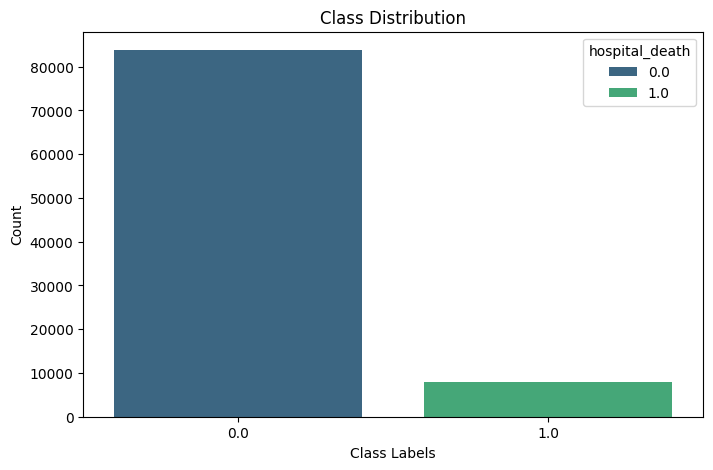

In [ ]:
def distribution_plot(ICU_raw):

    class_counts = ICU_raw['hospital_death'].value_counts() #frequence of each class

    # Plot class distribution
    plt.figure(figsize=(8,5))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis", hue=class_counts.index)
    plt.xlabel("Class Labels")
    plt.ylabel("Count")
    plt.title("Class Distribution")
    plt.show()
    
distribution_plot(ICU_raw)

#### Resampling

As we have previously said, we are going to apply the Random Over Sampling technique. This will allow us balance the target class so that the model behaves equally well on both of them. We will not lose information unlike the undersampling technique.
Following the steps of the lab2 we have:

In [ ]:
from imblearn.over_sampling import RandomOverSampler

def resampling(ICU_raw, name): #the second argument determines the filename of the csv saved.

    y = ICU_raw['hospital_death'] #locate target class
    X = ICU_raw.drop('hospital_death', axis=1) #delete it from the dataset
 
    sampler = RandomOverSampler(random_state=0) #Oversampling technique
    X_resampled, y_resampled = sampler.fit_resample(X, y) 

    ICU_raw = pd.concat([X_resampled, y_resampled], axis=1)
    ICU_raw.to_csv(f'processed_data/{name}_processed.csv', index=False) #save the processed dataset
    
    class_counts = ICU_raw['hospital_death'].value_counts()
    
    print('Preprocessing Step 5: Resampling\n')
    print(f'Target class count: \n{class_counts}')
    print("\n" + "-"*50 + "\n")
    
    return ICU_raw

ICU_raw = resampling(ICU_raw, 'ICU_raw')

Preprocessing Step 5: Resampling

Target class count: 
hospital_death
0.0    83798
1.0    83798
Name: count, dtype: int64

--------------------------------------------------



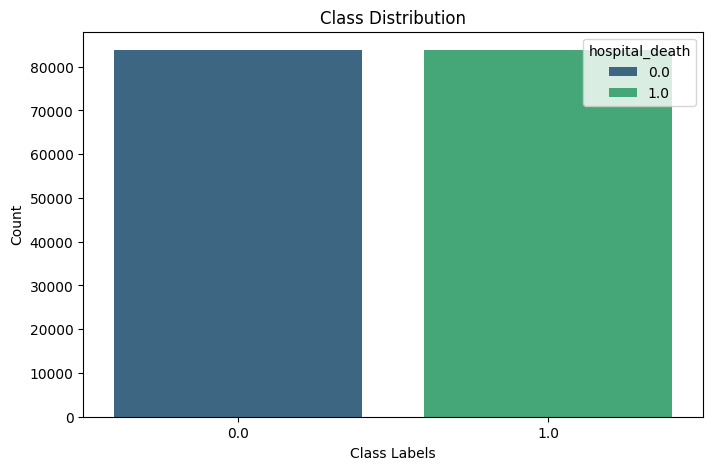

In [14]:
distribution_plot(ICU_raw)

## Data Splitting
### K-fold Validation

The first step is to create a trainig and testing samples. We will use the K-fold Validation technique in order to split the dataset in K small partitions, then train the model on K-1 of these subsets, and test it on the remaining fold. This process is repeated K times.
In this case K=5.

This technique is useful for creating a more reliable model evaluation. It employs data efficiently, every data point is used for both training and testing, making the most out of limited datasets. Finally, it reduces overfitting. It helps detect models that perform well on one subset but poorly on others, preventing overly optimistic performance estimates.

In [ ]:
from sklearn.model_selection import KFold

def Kfold(ICU_raw):
    kf = KFold(n_splits=5, random_state=42, shuffle=True) #We use the Kfold technique to split the dataset into 5 folds
    folds = []
    for train, test in kf.split(ICU_raw): #We split the dataset into train and test sets
        train_set = ICU_raw.iloc[train] #We locate the train set
        test_set = ICU_raw.iloc[test] #We locate the test set
        folds.append((train_set, test_set)) #We append the train and test set to the folds list

    print('Preprocessing Step 6: Kfold Validation technique\n')
    print("\n" + "-"*50 + "\n")
        
    return folds


folds = Kfold(ICU_raw)

Preprocessing Step 6: Kfold Validation technique


--------------------------------------------------



We have preprocessed our original dataframe and "clean" it to easen the training and testing step.

## Task 2: Model training and testing

## Model choice

We are going to train and test 2 models. 
The missing values has been previously imputed using the Simple Imputer technique, the target classes have been balanced using the oversampling method and the dataset has been splitted using the KFold Validatation.  

Each model will be saved and stored in the "models" folder of this project. 


### KNN
Originally I was going to compile a KNN model. 
Nevertheless, I have not to for the following reasons:

- High computational cost (slow prediction time): It stores all the training data and only computes distances at prediction time.
For large datasets with millions of points, calculating the distance from a query point to all training samples is computationally expensive.
- Memory usage: KNN needs to store the entire dataset in memory, making it impractical for very large datasets.
- High dimensionality, When the number of features is high, the distance between points becomes less meaningful, making KNN less effective. Many points tend to be equally distant from the query point, reducing KNN’s ability to distinguish between classes.

[Medium KNN in ML](https://medium.com/@akankshaverma136/k-nearest-neighbor-knn-in-machine-learning-0f7782c7fa2f)

Moreover, model does not allow missing values so when not applying the imputation technique in the next steps we would have encounter an issue. We would not be able to compare the other models to the KNN.

### Decision Tree Classifier
We have implemented this model because it offers several advantages for large datasets such as:

- Fast training time (O(n log n)): it splits data recursively, making them significantly faster to train compared to algorithms like KNN (O(n²)) or deep learning models that require iterative optimization. They scale well with large datasets due to efficient partitioning.
- Low memory usage: unlike KNN, which stores the entire dataset, Decision Trees only store the tree structure, reducing memory consumption, making them practical for large datasets.
- Handles high-dimensional data well: they are robust in datasets with many features, avoiding the "Curse of Dimensionality" that affects distance-based methods like KNN.

[Abhishek Jain, 2024, All about decision trees](https://medium.com/@abhishekjainindore24/all-about-decision-trees-80ea55e37fef)

### Random Forest

Random Forest is an ensemble learning algorithm that combines multiple Decision Trees to improve accuracy and reduce overfitting.
First, it does a Bootstrap Aggregation (Bagging technique). The algorithm creates multiple Decision Trees, each trained on a random subset of the data. This randomness ensures diversity in trees and prevents overfitting. At each tree split, only a random subset of features is considered instead of all features. This makes trees less correlated and improves generalization. For classification, each tree votes for a class, and the majority class is the final prediction.

The advantages of using this type of classifier are:
- Handles large datasets efficiently
- Reduces overfitting
- Handles high-dimensional data
- Missing values handling and irrelevant features without imputation.
- Parallel execution
- Less training time.

[scikit-learn Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

### Logistic regression

I wrote a training and testing Logistic Regression model code. Nevertheless, the model did not converge for none of the parameters I tried.

After some research, I figured out that this kind of models do not behave well with large datasets.

- Computational inefficiency (O(n × p)): Logistic Regression requires iterative optimization, which can be slow for datasets with millions of samples (n) or features (p). As dataset size grows, the time to converge increases significantly.

- Poor performance with high-dimensional data: In datasets with many irrelevant or correlated features, Logistic Regression struggles due to overfitting or inefficient learning.
- Assumption of linearity: it assumes a linear relationship between independent variables.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

def model(folds, classifier, name): #this metjod is used to train the model and evaluate it using the Kfold technique

    print('Training and Test\n')

    best_accuracy = 0 #we are going to determine the best model based on the accuracy
    best_model = None #we store the best model
    best_param = None #we store the model's parameter with the best accuracy
    best_f1_score = None #we store the F1-score of the best model
    overall_train_scores, overall_test_scores = list(), list()
    results = [] #store the results of the each model for each parameter and kfold

    if classifier == 'KNN' or classifier == 'DecisionTree':
        values = [i for i in range(1, 21)] #We define the range of values for the parameter of the Decision Tree form 1 to 20 nodes
    elif classifier == 'RandomForest':
        values = [i for i in range(10, 110, 10)]#We define the range of values for the parameter of the Random Forest from 10 to 100 trees
    
    fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True) #We create a figure with 5 subplots
    fig.suptitle(f'{classifier} Model Performance Across Folds') 

    for fold, (train_set, test_set) in enumerate(folds): #We iterate over the folds
        y_train = train_set['hospital_death'] #train set target class
        X_train = train_set.drop('hospital_death', axis=1) #train set features
        y_test = test_set['hospital_death'] #test set target class
        X_test = test_set.drop('hospital_death', axis=1) #test set features
    
        train_scores, test_scores = list(), list() #list to store results
        train_f1_scores, test_f1_scores = list(), list()  #list to store best results
      
        
        for i in values: # configuration of the model
            if classifier == 'KNN':
                model = KNeighborsClassifier(n_neighbors=i, #Number of nearest neighbors considered for classification: from 1 to 20
                                             algorithm='ball_tree', #efficient nearest-neighbor searches, better for high-dimensional data.
                                             n_jobs=-1) #uses all available CPU cores for parallel computation, improving speed on large datasets.

            elif classifier == 'DecisionTree':
                model = DecisionTreeClassifier(criterion='gini', #Splits nodes using Gini impurity
                                               max_depth=i, #Controls the maximum depth of the tree to prevents overfitting: from 1 to 20
                                               max_features="sqrt", #Uses square root of total features at each split, reduces overfitting and speeds up training.
                                               random_state=42) #Ensures reproducibility by fixing randomness.

            elif classifier == 'RandomForest':
                model = RandomForestClassifier(n_estimators=i, #Number of trees in the forest. from 10 to 100 trees
                                               criterion='gini', #Uses Gini impurity for split selection 
                                               max_depth=None, #Trees grow fully until leaves contain only one class, can lead to overfitting
                                               max_features='sqrt', #Each tree considers square root of total features per split, reduces correlation among trees improving generalization.
                                               random_state=42, #Ensures reproducibility by fixing randomness.
                                               n_jobs=-1) #uses all available CPU cores for parallel computation, improving speed on large datasets.
     
            
            model.fit(X_train, y_train) #We train the model using the train set
            #training
            train_yhat = model.predict(X_train) #We predict the target class using the train set
            train_acc = accuracy_score(y_train, train_yhat) #We calculate the accuracy of the model using the train set
            train_f1 = f1_score(y_train, train_yhat) #We calculate the F1-score of the model using the train set
            train_scores.append(train_acc) #store training accuracy
            train_f1_scores.append(train_f1)#store training F1-score

            #testing
            test_yhat = model.predict(X_test) #We predict the target class using the test set
            test_acc = accuracy_score(y_test, test_yhat) #We calculate the accuracy of the model using the test set
            test_f1 = f1_score(y_test, test_yhat) #We calculate the F1-score of the model using the test set
            test_scores.append(test_acc) #store testing accuracy
            test_f1_scores.append(test_f1) #store testing F1-score

            # Store results
            results.append({ #store the results of each model for each parameter and kfold
                'classifier': classifier,
                'parameter': i,
                'fold': fold + 1,
                'test_accuracy': round(test_acc, 3),
                'test_f1_score': round(test_f1, 3)
            })

            if test_acc > best_accuracy: #Condition to determine the best model based on the accuracy
                best_accuracy = test_acc
                best_model = model #store the best model
                best_param = i #store the model's parameter with the best accuracy
                best_f1_score = test_f1 #store the F1-score of the best model

        # accumulate scores across all folds
        overall_train_scores.append(train_scores)
        overall_test_scores.append(test_scores)
 
        axs[fold].plot(values, train_scores, '-o', color='red', label='Train Accuracy') #plot the training accuracy
        axs[fold].plot(values, test_scores, '-o', color='green', label='Test Accuracy') #plot the testing accuracy
        axs[fold].plot(values, train_f1_scores, '--o', color='pink', label='Train F1 Score') #plot the training F1-score
        axs[fold].plot(values, test_f1_scores, '--o', color='yellow', label='Test F1 Score')#plot the testing F1-score
        axs[fold].set_title(f'Fold {fold+1}')
        axs[fold].set_xlabel('Parameter Value')
        if fold == 0:
            axs[fold].set_ylabel('Metrics Value')
        axs[fold].legend()

        print(f"{classifier} Fold {fold+1} Finished") #print the fold number that has been finished to keep track of the progress

    joblib.dump(best_model, f"models/{classifier}_{name}.pkl") #save the best model using joblib library
    print(f"Best '{classifier}' model with parameter '{best_param}' and test accuracy: {best_accuracy:.3f} and F1-score: {best_f1_score:.3f}") #print the best model with its parameter, accuracy and F1-score
   
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show() #show the plot

    # Save the results to a CSV file
    results_df = pd.DataFrame(results)
    results_df.to_csv(f"results/{classifier}_{name}_results.csv", index=False) #save the results of the model to a csv file

    return best_model, best_accuracy, best_param, best_f1_score #return the best model, its accuracy, parameter and F1-score


This method is used to train and test each model. For each parameter and fold, we determine the model's accuracy and F1-Score. We have selected the accuracy as an evaluation metric for classification tasks because it is easy to interprete. It measures the percentage of correctly classified instances in the dataset. It is also useful for general performance assessmente, it works well when false positives and false negatives are equally important. 


TP = True Positives; TN = True Negatives; FP = False Positive; FN = False Negative
$$
{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$ 

Nevertheless, the accuracy can be misleading for imbalanced datasets. For this reason, we have also determined the F1-score for each model. It represents the harmonic mean of precision and recall. The first one, measures how many of the predicted positives are actually correct. The recall metric measures how many actual positives were correctly identified.

$$
{Precision} = \frac{TP}{TP + FP}
$$ 

$$
{Recall} = \frac{TP}{TP + FN}
$$ 

$$
{F1-score} = 2* \frac{Precision * Recall}{Precision + Recall}
$$ 

Unlike accuracy, F1-score considers both false positives and false negatives, making it more reliable for skewed datasets. Finally it ensures that the model does not ignore the minority class in classification problems with class imbalances.


This last best_model(folds, name) method is the controler of the whole training and testing process. We call the model() method stating which available model we want to employ. In this case, we use both decision tree and random forest. The KNN model is configured but will not be evaluated because of the reasons we have already discussed.

Training and Test

DecisionTree Fold 1 Finished
DecisionTree Fold 2 Finished
DecisionTree Fold 3 Finished
DecisionTree Fold 4 Finished
DecisionTree Fold 5 Finished
Best 'DecisionTree' model with parameter '20' and test accuracy: 0.941 and F1-score: 0.944


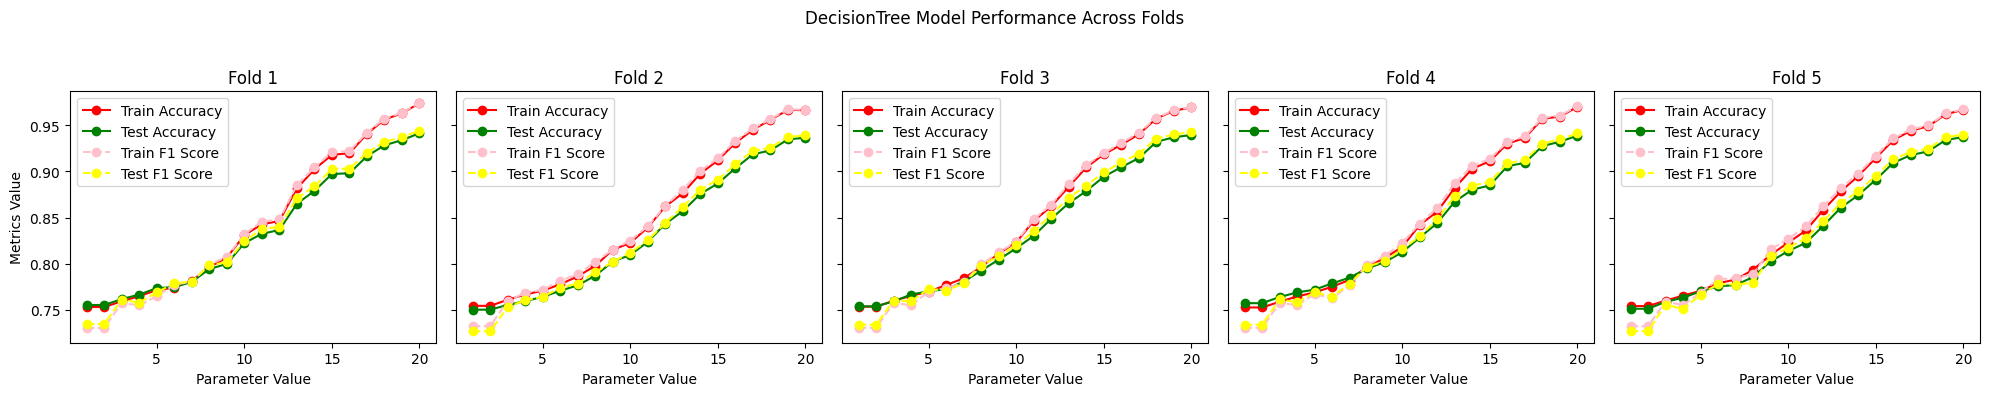

Training and Test

RandomForest Fold 1 Finished
RandomForest Fold 2 Finished
RandomForest Fold 3 Finished
RandomForest Fold 4 Finished
RandomForest Fold 5 Finished
Best 'RandomForest' model with parameter '80' and test accuracy: 0.991 and F1-score: 0.991


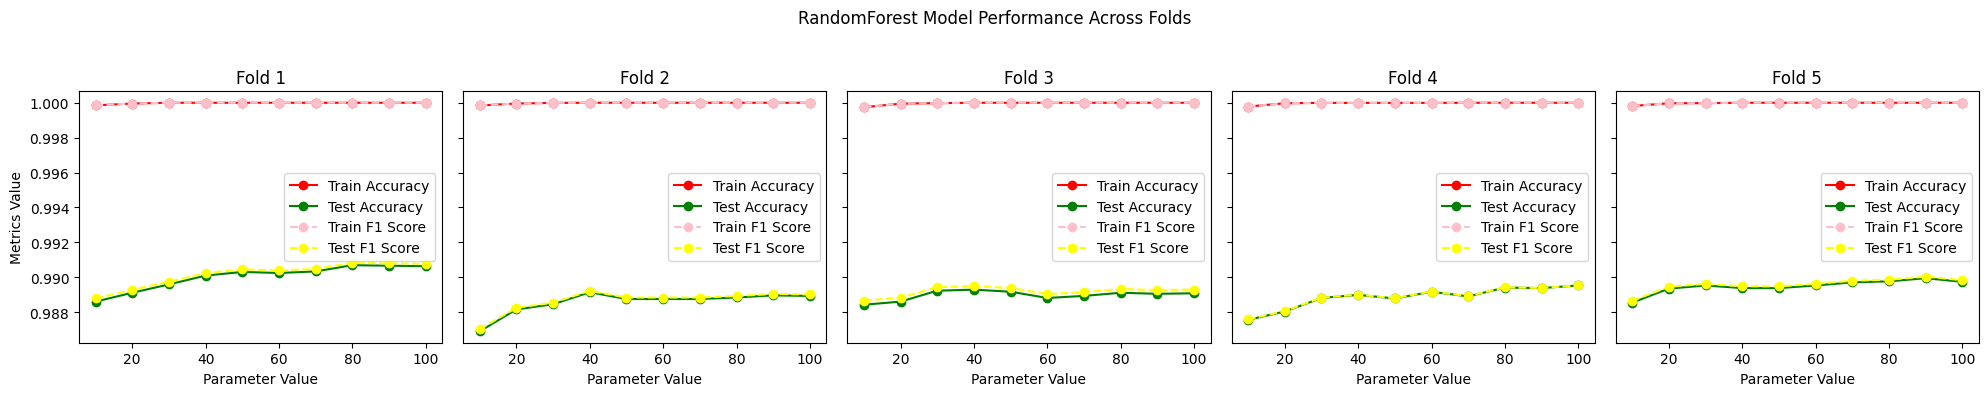

Best Overall model is 'RandomForest' with parameter '80', best test accuracy: 0.991 and its F1-score is: 0.991


In [ ]:
def best_model(folds, name):
    
    best_models = [] #store the best models of each classifier to determine the best overall model

    for classifier in ['DecisionTree', 'RandomForest']:
        best_model, best_accuracy, best_param, best_f1_score = model(folds, classifier, name) #call the model method to train and evaluate the model
        best_models.append((best_model, best_accuracy, classifier, best_param, best_f1_score)) #we append the best model, its accuracy, classifier, parameter and F1-score to the best_models list

    # Find the best model among all classifiers
    best_model_overall, best_accuracy_overall, best_classifier, best_param_overall, best_f1_score_overall = max(best_models, key=lambda item: item[1]) #we determine the best overall model based on the 2º item of the list == the accuracy (count starts from 0)

    joblib.dump(best_model_overall, f"models/best_model_{name}.pkl") #We save the best overall model using joblib library
    print(f"Best Overall model is '{best_classifier}' with parameter '{best_param_overall}', best test accuracy: {best_accuracy_overall:.3f} and its F1-score is: {best_f1_score_overall:.3f}") #print the best overall model with its parameter, accuracy and F1-score

    return best_model_overall


best_model_overall = best_model(folds, 'ICU_raw')

All of these methods will be called in the following section to train and test the models for each case. We have already trained and tested the Decision Tree and Random Forest for a imputed and class balanced dataset. Now, we will see the results when either of one of these preprocessing techniques are missing. 

# Task 3: Results

Preprocessing Step 1: Column Dropping

   hospital_death   age    bmi  elective_surgery  ethnicity gender  height
0             0.0  68.0  22.73               0.0  Caucasian      M   180.3
1             0.0  77.0  27.42               0.0  Caucasian      F   160.0
2             0.0  25.0  31.95               0.0  Caucasian      F   172.7
3             0.0  81.0  22.64               1.0  Caucasian      F   165.1
4             0.0  19.0    NaN               0.0  Caucasian      M   188.0
5             0.0  67.0  27.56               0.0  Caucasian      M   190.5
6             0.0  59.0  57.45               0.0  Caucasian      F   165.1
7             0.0  70.0    NaN               0.0  Caucasian      M   165.0

--------------------------------------------------

Preprocessing Step 2: Missing Value Evaluation

Number of features with more than 50% of MV that verify the condition and were deleted:74
Dataset shape after column dropping: (91713, 179)
   hospital_death   age    bmi  elective_surg

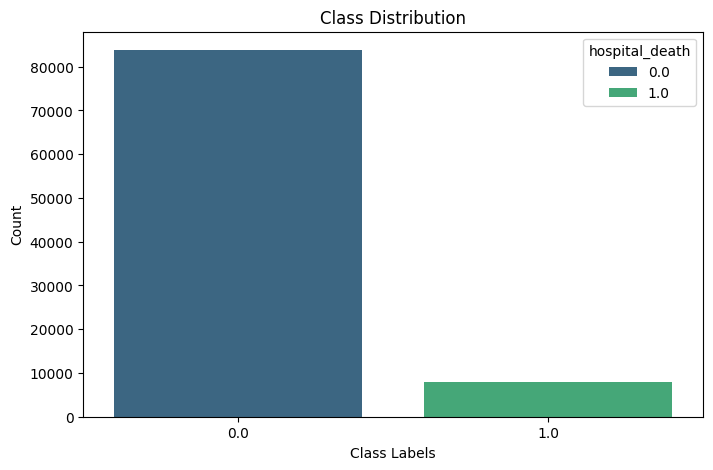

Preprocessing Step 4: Label Encoding

dataset shape after label encoding: (91713, 105)
   hospital_death   age    bmi  elective_surgery  ethnicity  gender  height
0             0.0  68.0  22.73               0.0        2.0     1.0   180.3
1             0.0  77.0  27.42               0.0        2.0     0.0   160.0
2             0.0  25.0  31.95               0.0        2.0     0.0   172.7
3             0.0  81.0  22.64               1.0        2.0     0.0   165.1
4             0.0  19.0    NaN               0.0        2.0     1.0   188.0
5             0.0  67.0  27.56               0.0        2.0     1.0   190.5
6             0.0  59.0  57.45               0.0        2.0     0.0   165.1
7             0.0  70.0    NaN               0.0        2.0     1.0   165.0

--------------------------------------------------

Preprocessing Step 5: Resampling

Target class count: 
hospital_death
0.0    83798
1.0    83798
Name: count, dtype: int64

--------------------------------------------------



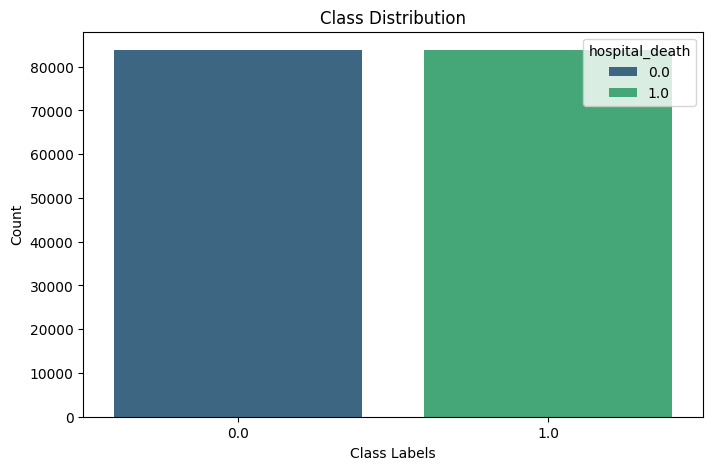

Preprocessing Step 6: Kfold Validation technique


--------------------------------------------------

Training and Test

DecisionTree Fold 1 Finished
DecisionTree Fold 2 Finished
DecisionTree Fold 3 Finished
DecisionTree Fold 4 Finished
DecisionTree Fold 5 Finished
Best 'DecisionTree' model with parameter '19' and test accuracy: 0.947 and F1-score: 0.950


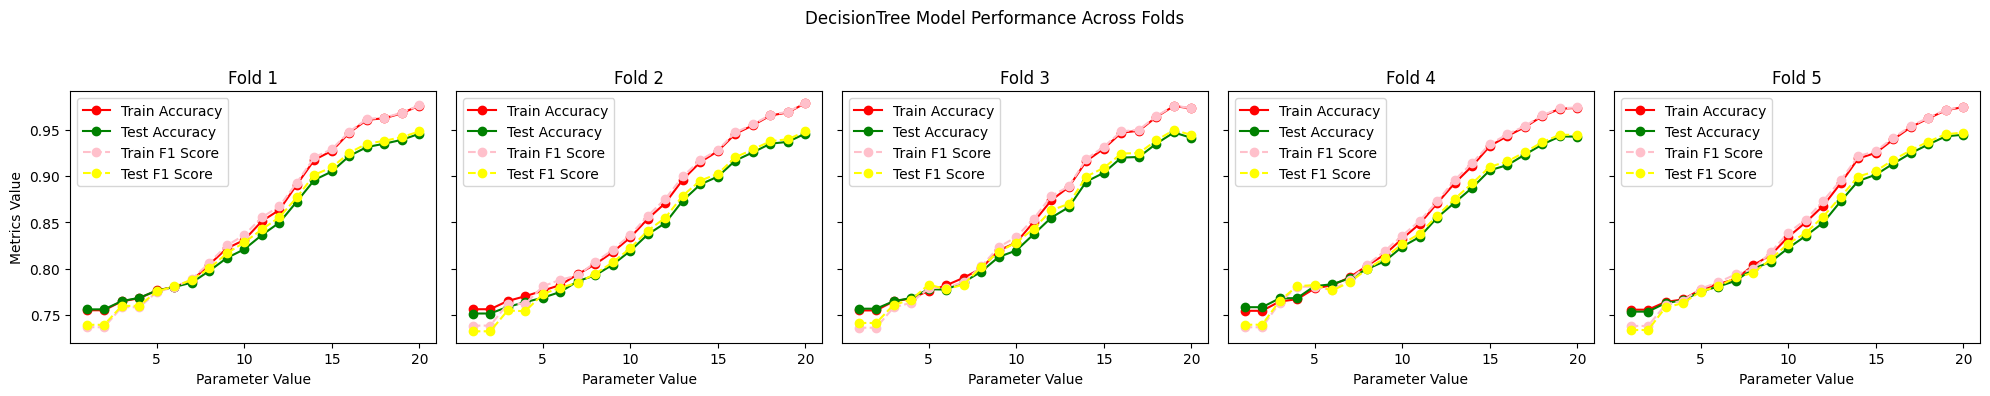

Training and Test

RandomForest Fold 1 Finished
RandomForest Fold 2 Finished
RandomForest Fold 3 Finished
RandomForest Fold 4 Finished
RandomForest Fold 5 Finished
Best 'RandomForest' model with parameter '90' and test accuracy: 0.990 and F1-score: 0.990


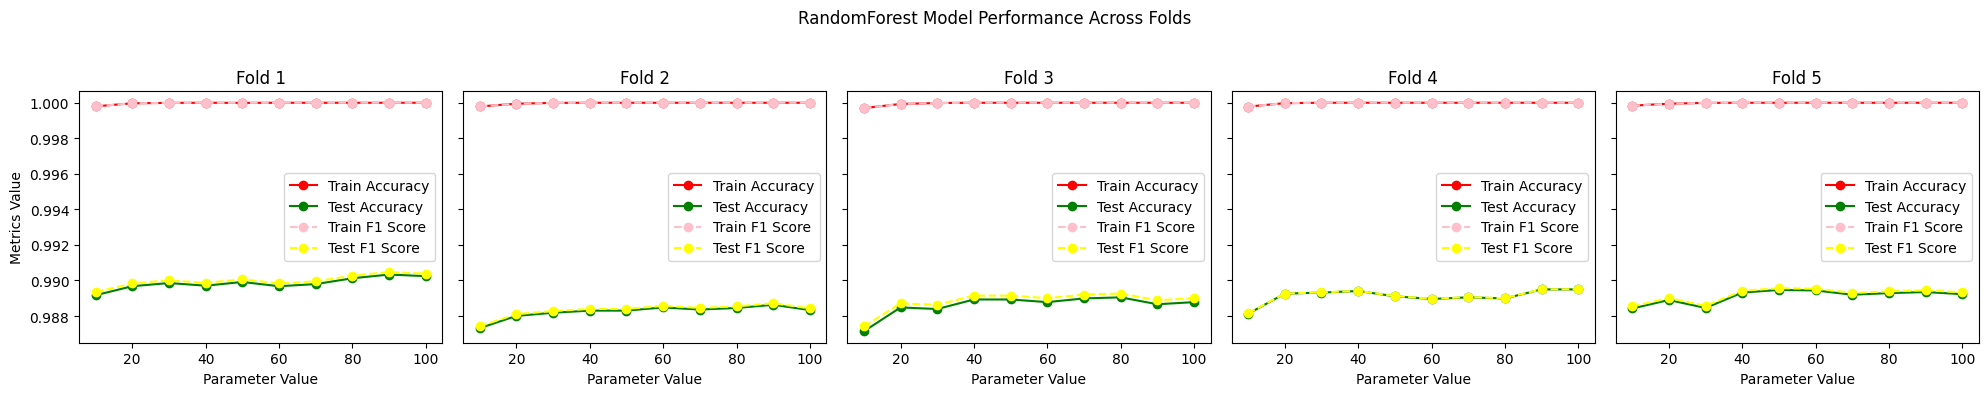

Best Overall model is 'RandomForest' with parameter '90', best test accuracy: 0.990 and its F1-score is: 0.990


In [18]:
def no_imputation(ICU_raw_data):
    ICU_raw_no_imputate = ICU_raw_data.copy()
    ICU_drop = drop(ICU_raw_no_imputate)
    ICU_mv = missing_values(ICU_drop)

    #UCI_si = impute_si(ICU_mv)

    distribution_plot(ICU_mv)

    ICU_encoded = label_encoder(ICU_mv)
    ICU_class_balance = resampling(ICU_encoded, 'no_imputate' )

    distribution_plot(ICU_class_balance)
    
    ICU_Kfold = Kfold(ICU_class_balance)
    best_model(ICU_Kfold, 'no_imputate')

no_imputation(ICU_raw_data)


Preprocessing Step 1: Column Dropping

   hospital_death   age    bmi  elective_surgery  ethnicity gender  height
0             0.0  68.0  22.73               0.0  Caucasian      M   180.3
1             0.0  77.0  27.42               0.0  Caucasian      F   160.0
2             0.0  25.0  31.95               0.0  Caucasian      F   172.7
3             0.0  81.0  22.64               1.0  Caucasian      F   165.1
4             0.0  19.0    NaN               0.0  Caucasian      M   188.0
5             0.0  67.0  27.56               0.0  Caucasian      M   190.5
6             0.0  59.0  57.45               0.0  Caucasian      F   165.1
7             0.0  70.0    NaN               0.0  Caucasian      M   165.0

--------------------------------------------------

Preprocessing Step 2: Missing Value Evaluation

Number of features with more than 50% of MV that verify the condition and were deleted:74
Dataset shape after column dropping: (91713, 179)
   hospital_death   age    bmi  elective_surg

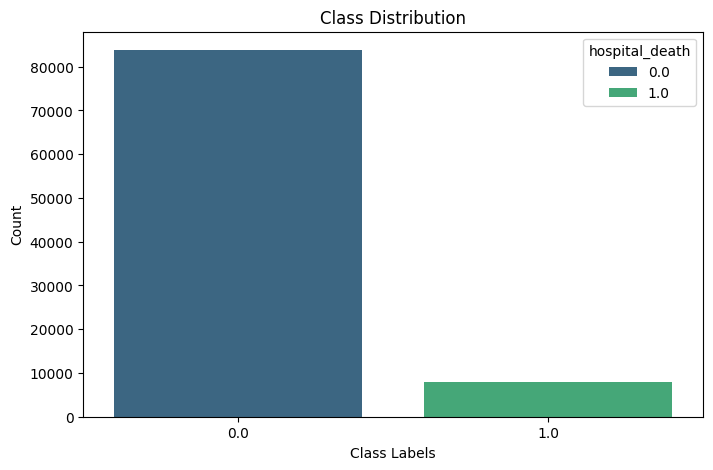

Preprocessing Step 6: Kfold Validation technique


--------------------------------------------------

Training and Test

DecisionTree Fold 1 Finished
DecisionTree Fold 2 Finished
DecisionTree Fold 3 Finished
DecisionTree Fold 4 Finished
DecisionTree Fold 5 Finished
Best 'DecisionTree' model with parameter '7' and test accuracy: 0.924 and F1-score: 0.328


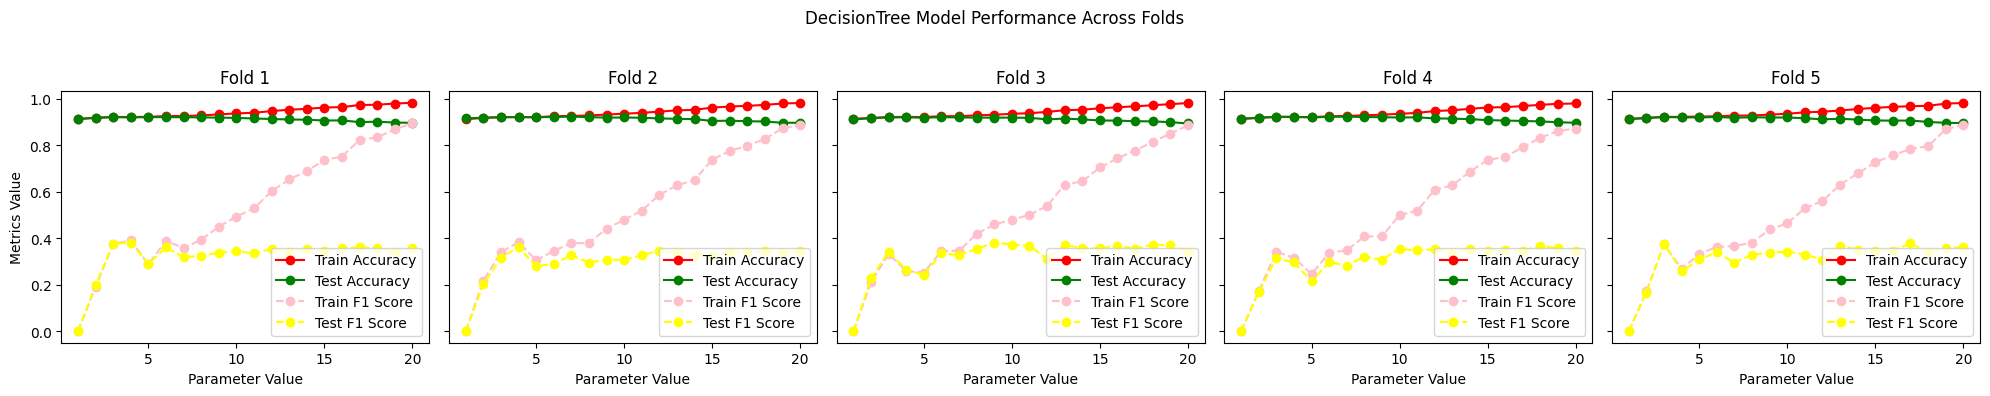

Training and Test

RandomForest Fold 1 Finished
RandomForest Fold 2 Finished
RandomForest Fold 3 Finished
RandomForest Fold 4 Finished
RandomForest Fold 5 Finished
Best 'RandomForest' model with parameter '60' and test accuracy: 0.930 and F1-score: 0.384


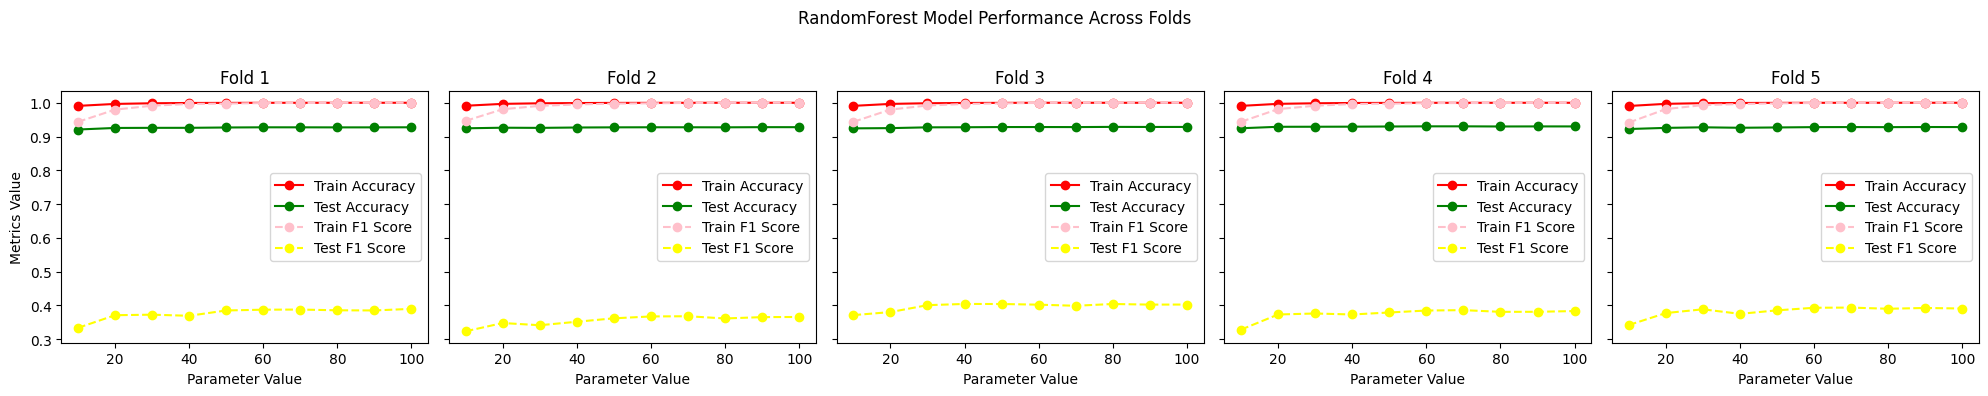

Best Overall model is 'RandomForest' with parameter '60', best test accuracy: 0.930 and its F1-score is: 0.384


In [19]:
def no_class_balance(ICU_raw_data):
    ICU_raw_no_cb = ICU_raw_data.copy()
    ICU_drop = drop(ICU_raw_no_cb)
    ICU_mv = missing_values(ICU_drop)
    UCI_si = impute_si(ICU_mv)
    ICU_encoded = label_encoder(UCI_si)

    #ICU_class_balance = resampling(ICU_encoded,'ICU_raw_no_cb')

    distribution_plot(ICU_encoded)
    ICU_encoded.to_csv(f'processed_data/no_cb_processed.csv', index=False)

    ICU_Kfold = Kfold(ICU_encoded)
    best_model(ICU_Kfold, 'no_cb')  

no_class_balance(ICU_raw_data)

## TASK 4: feature importance techniques

For this task we are going to load the existing models that we have tuned and the datasets they were trained and tested with. 

Both models were tuned with the criterion 'Gini'. It evaluates the impurity of a node, in other words, it measures how mixed or uncertain the labels are within that node. If a node is pure, it contains only one class. If a node is impure, it contains a mix of different classes. The lower the Gini impurity is, the better. 

In [ ]:

def feature_importance():

    decision_tree = joblib.load('models/DecisionTree_ICU_raw.pkl') # Load the Decision Tree model
    random_forest = joblib.load('models/RandomForest_ICU_raw.pkl') # Load the Random Forest model
    data = pd.read_csv('processed_data/ICU_raw_processed.csv')

    X = data.drop(columns=["hospital_death"])  # Drop the mortality target variable
    y = data["hospital_death"] # Target variable

    feature_names = X.columns  # Get the feature names 

    # Get feature importance
    dt_importance = decision_tree.feature_importances_
    rf_importance = random_forest.feature_importances_


    feature_importance_df = pd.DataFrame({
        "Feature": feature_names,
        "DecisionTree_Importance": dt_importance,
        "RandomForest_Importance": rf_importance
    })

    # average importance score
    feature_importance_df["Mean_Importance"] = feature_importance_df[["DecisionTree_Importance", "RandomForest_Importance"]].mean(axis=1)


    feature_importance_df.to_csv("results/ICU_feature_importance.csv", index=False) #we save the feature importance to a csv file

    top_10_features = feature_importance_df.sort_values(by="Mean_Importance", ascending=True).head(10) # we sort the features by the mean importance and get the top 10 best features
    print(top_10_features) 

feature_importance()

                         Feature  DecisionTree_Importance  \
94                          aids                 0.000086   
100                     lymphoma                 0.000030   
99                      leukemia                 0.000163   
95                     cirrhosis                 0.000032   
13                    arf_apache                 0.000096   
97               hepatic_failure                 0.000566   
18             gcs_unable_apache                 0.000503   
98             immunosuppression                 0.000508   
101  solid_tumor_with_metastasis                 0.000850   
96             diabetes_mellitus                 0.000832   

     RandomForest_Importance  Mean_Importance  
94                  0.000052         0.000069  
100                 0.000168         0.000099  
99                  0.000189         0.000176  
95                  0.000393         0.000213  
13                  0.000510         0.000303  
97                  0.000462         0.0

## Discussion

We have evaluated the performance of decision tree and random forest models on three different dataframes: ICU_raw, no_imputate, and Ino_cb. Each of these datasets had different preprocessing steps, including data cleaning, imputation, and class balancing, which contributed to variations in the model outcomes.

1. ICU_raw Dataset:
This dataset was cleaned, the missing values imputated using the Simple Imputer technique, and the class distribution was balanced.

- Decision tree model: With a max_depth of 20, the decision tree achieved an accuracy of 94.1% and a F1-score of 94.4%. These results suggest that the decision tree model effectively captured the underlying patterns in the data, especially given the balanced class distribution and imputed values.
- Random forest model: with 80 trees, the model showed the best performance, achieving an accuracy of 99.1% and an F1-score of 99.1%. The random forest's ability to aggregate the predictions from multiple decision trees likely contributed to the higher performance, making it a stronger model compared to the single decision tree.

2. no_imputate Dataset:
This dataset also underwent data cleaning but without imputation, and the class distribution was balanced.

- Decision tree model: In this case, the decision tree achieved a max_depth of 19. This means it overfitting when it reached a max_depth of 20 nodes. It obtained an accuracy of 94.7% and an F1-score of 95.0%. These results are slightly better than those of the ICU_raw dataset, likely due to the absence of imputation, which may have introduced noise in the previous model.
- Random forest model: Using 90 trees, also overfitting at 100 trees, achieved an accuracy of 99.0% and an F1-score of 99.0%, similar to the results from the ICU_raw dataset. The absence of imputation did not have a significant negative impact on the performance of the random forest model, indicating its resilience to missing data.

3. Ino_cb Dataset:
This dataset underwent data cleaning and imputation, but the class distribution was imbalanced.

- Decision tree model: With a max_depth of 7 the model achieved an accuracy of 92.4% but struggled with imbalanced data, leading to an F1-score of 32.8%. The model was already overfitted for a max_depth of 8 nodes. The low F1-score highlights the difficulty of the decision tree in capturing the minority class due to the class imbalance, leading to poor performance in terms of precision and recall for that class.
- Random forest model: The random forest with 60 trees achieved an accuracy of 93.0% and an F1-score of 38.4%, showing a slight improvement over the decision tree. However, the imbalance in the class distribution reduce the performance of the model, with the random forest struggling similarly to the decision tree when it comes to classifying the minority class.

4. Feature Importance Analysis:
The feature importance results from both the decision tree and random forest models gini impurity score.

The best predicting features for ICU mortality were the existing of aids (0.000069), hepatic failure (0.000514), diabetes mellitus (0.000972), cirrhosis (0.000213 ), aggressive cancers such as lymphoma (0.000099), leukemia (0.000176) and features related to metastatic tumors such as immunosuppression (0.000558) and solid_tumor_with_metastasis (0.000814).

This conditions allign with clinical knowledge, as these conditions are often associated with poor prognosis in critically ill patients. 

Conclusion:
The ICU_raw and no_imputate datasets produced strong results, particularly with random forest models, showing high accuracy and F1-scores, highlighting the value of imputation and class balancing in predictive modeling.
For the Ino_cb dataset, we observed that both models struggled with accuracy and F1-score due to the imbalance, reinforcing the importance of addressing class imbalance when working with real-world datasets.
The feature importance analysis revealed that certain medical conditions and factors, play a significant role in predicting ICU mortality.
These results emphasize the importance of data preprocessing, feature selection, and model choice when working with healthcare data, especially for predicting critical outcomes such as mortality in the ICU.











## Task 7: Explore the time dimention

The only temporal feature I could find in the dataset was "pre_icu_los_days". It shows the patients' length of stay between hospital and unit admission in days. 
We can represent the final outcome form the hospital_death class, death or survival, for each the time frame form this feature in hours.

By setting some bins or time limits, me can distribute each outcome of the target class for the pre_icu_los_days feature. This relation provides useful information about the correlation between the final outcome and the waiting time from being accepted to the hospital and being finally sent to ICU.

[Cody Chen, 2020, Machine Learning in Healthcare — WidsDatathon2020](https://medium.com/@chen.szuyu.cody/using-ensemble-learning-in-health-care-data-widsdatathon2020-318cb35edd96)

C:\Users\beto1\AppData\Local\Temp\ipykernel_12064\402335860.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = filtered_data.groupby(['time_interval', 'hospital_death']).size().unstack(fill_value=0)# Group by the time intervals and hospital_death, and count the number of occurrences


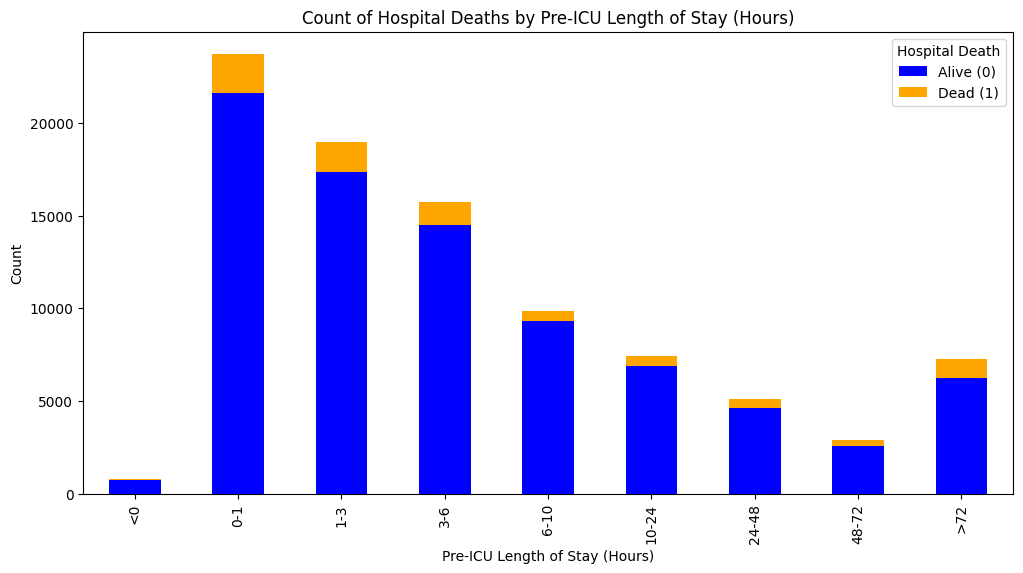

In [33]:
ICU_raw_data = pd.read_csv('raw_data/training_v2.csv')  # Load the raw data

filtered_data = ICU_raw_data[ICU_raw_data['pre_icu_los_days'].notnull()] # Filter out rows with missing values in 'pre_icu_los_days'
filtered_data['pre_icu_los_hours'] = filtered_data['pre_icu_los_days'] * 24# Convert 'pre_icu_los_days' to hours


bins = [-float('inf'), 0, 1, 3, 6, 10, 24, 48, 72, float('inf')] # we define the bins for the time intervals
labels = ['<0', '0-1', '1-3', '3-6', '6-10', '10-24', '24-48', '48-72', '>72'] 

filtered_data['time_interval'] = pd.cut(filtered_data['pre_icu_los_hours'], bins=bins, labels=labels, right=False) # We create a new column for the time intervals

grouped_data = filtered_data.groupby(['time_interval', 'hospital_death']).size().unstack(fill_value=0)# Group by the time intervals and hospital_death, and count the number of occurrences

grouped_data.plot(kind='bar', stacked=True, color=['blue', 'orange'], figsize=(12, 6))

plt.title('Count of Hospital Deaths by Pre-ICU Length of Stay (Hours)')
plt.xlabel('Pre-ICU Length of Stay (Hours)')
plt.ylabel('Count')
plt.legend(title='Hospital Death', labels=['Alive (0)', 'Dead (1)'])
plt.show()

We can see that the shorter the waiting time is after being accepted to the hospital and then sent to ICU is, the better the final outcome for the patient is. The ICU is a unit for several and intensive care, patient do not spend much time there. Nevertheless the quicker those patients arrive at ICU, the faster they could be treated. We can se that patient that arrive to the ICU within 3 or 6 hours are more like to survive. 